In [40]:
# 01 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 02 load data
df=pd.read_csv("listings 2.csv")

/tmp/ipython-input-3475188857.py:2: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("listings 2.csv")


In [42]:
# 03 Quick look at the Dataset
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220603182654,2022-06-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.31
1,5121,https://www.airbnb.com/rooms/5121,20220603182654,2022-06-04,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220603182654,2022-06-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178,https://www.airbnb.com/rooms/5178,20220603182654,2022-06-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.44,4.87,4.39,NaN,f,1,0,1,0,3.37
4,5203,https://www.airbnb.com/rooms/5203,20220603182654,2022-06-03,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.76


In [43]:
# 04 Identify Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  int64  
 1   listing_url                                   37410 non-null  object 
 2   scrape_id                                     37410 non-null  int64  
 3   last_scraped                                  37410 non-null  object 
 4   name                                          37396 non-null  object 
 5   description                                   36523 non-null  object 
 6   neighborhood_overview                         22430 non-null  object 
 7   picture_url                                   37410 non-null  object 
 8   host_id                                       37410 non-null  int64  
 9   host_url                                      37410 non-null 

In [44]:
# 05 Check for Duplicate Records
df.duplicated().sum()

np.int64(0)

In [45]:
# 06 Check for Missing Values
df.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
name,14
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [46]:
# 07 Interpret Missing values
# name 14个missing values什么都不填，不参与建模
# 关联字段验证reviews_per_month不存在
df.loc[
    df['reviews_per_month'].isnull(),
    'number_of_reviews'
].describe()

,number_of_reviews
count,7949.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [47]:
df['reviews_per_month']=df['reviews_per_month'].fillna(0)
df['has_reviews'] = (df['number_of_reviews'] > 0).astype(int)

In [48]:
# 08 Detect zero values
numeric_cols=df.select_dtypes(include=['int64', 'float64'])
zero_counts=(numeric_cols==0).sum()
zero_counts[zero_counts>0].sort_values(ascending=False)

,0
calculated_host_listings_count_shared_rooms,36618
number_of_reviews_l30d,27212
availability_30,21833
calculated_host_listings_count_private_rooms,19808
number_of_reviews_ltm,19174
availability_60,18639
availability_90,16088
availability_365,14204
calculated_host_listings_count_entire_homes,13565
reviews_per_month,7949


In [49]:
# 处理accommodates为0
df.loc[
    df['accommodates'] == 0,
    'accommodates'
] = np.nan
df['accommodates'] = df.groupby('room_type')['accommodates']\
                        .transform(lambda x: x.fillna(x.median()))
df['accommodates_was_zero'] = df['accommodates'].isna().astype(int)

In [50]:
# 处理review_scores_accuracy为0
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].replace(0, np.nan)
df['has_accuracy_review'] = df['review_scores_accuracy'].notna().astype(int)
df['review_scores_accuracy'] = df['review_scores_accuracy'].fillna(
    df['review_scores_accuracy'].median()
)

In [51]:
# 处理review_scores_cleanliness为0
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].replace(0, np.nan)
df['has_cleanliness_review'] = (
    df['review_scores_cleanliness'].notna().astype(int)
)
median_clean = df['review_scores_cleanliness'].median()

df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(
    median_clean
)

In [52]:
# 处理review_scores_checkin为0
df['review_scores_checkin'] = df['review_scores_checkin'].replace(0, np.nan)
df['has_checkin_review'] = (
    df['review_scores_checkin'].notna().astype(int)
)
median_checkin = df['review_scores_checkin'].median()

df['review_scores_checkin'] = df['review_scores_checkin'].fillna(
    median_checkin
)

In [53]:
# 处理review_scores_communication为0
df['review_scores_communication'] = (
    df['review_scores_communication'].replace(0, np.nan)
)
df['has_communication_review'] = (
    df['review_scores_communication'].notna().astype(int)
)
median_comm = df['review_scores_communication'].median()

df['review_scores_communication'] = (
    df['review_scores_communication'].fillna(median_comm)
)

In [54]:
# 处理review_scores_location为0
df['review_scores_location'] = (
    df['review_scores_location'].replace(0, np.nan)
)
df['has_location_review'] = (
    df['review_scores_location'].notna().astype(int)
)
median_loc = df['review_scores_location'].median()

df['review_scores_location'] = (
    df['review_scores_location'].fillna(median_loc)
)

In [55]:
# # 处理review_scores_value为0
df['review_scores_value'] = (
    df['review_scores_value'].replace(0, np.nan)
)
df['has_value_review'] = (
    df['review_scores_value'].notna().astype(int)
)
median_value = df['review_scores_value'].median()

df['review_scores_value'] = (
    df['review_scores_value'].fillna(median_value)
)

In [56]:
# 处理review_scores_rating为0
df['review_scores_rating'] = (
    df['review_scores_rating'].replace(0, np.nan)
)
df['has_rating_review'] = (
    df['review_scores_rating'].notna().astype(int)
)
median_rating = df['review_scores_rating'].median()

df['review_scores_rating'] = (
    df['review_scores_rating'].fillna(median_rating)
)

In [57]:
# 处理host_listings_count为0
df['host_listings_count'] = df['host_listings_count'].replace(0, np.nan)
df['has_host_listings_count'] = (
    df['host_listings_count'].notna().astype(int)
)
median_host_cnt = df['host_listings_count'].median()

df['host_listings_count'] = df['host_listings_count'].fillna(
    median_host_cnt
)

In [58]:
# 处理host_total_listings_count为0
df['host_total_listings_count'] = (
    df['host_total_listings_count'].replace(0, np.nan)
)
df['has_host_total_listings_count'] = (
    df['host_total_listings_count'].notna().astype(int)
)
median_total = df['host_total_listings_count'].median()

df['host_total_listings_count'] = (
    df['host_total_listings_count'].fillna(median_total)
)

In [59]:
# 10 check for outliers for price
# 1) 把 price 转成纯数字（去掉 $ 和 , 等）
df['price'] = (
    df['price']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)  # 去掉 $ 和 逗号
    .str.strip()
)

# 2) 转成数值；转失败的变成 NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 3) 丢掉缺失和不合理值
df = df[df['price'].notna()]
df = df[df['price'] > 0]

# 计算四分位数
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# IQR 上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 标记 outliers
df['is_outlier_iqr'] = (
    (df['price'] < lower_bound) |
    (df['price'] > upper_bound)
)

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Number of outliers:", df['is_outlier_iqr'].sum())

Lower bound: -118.5
Upper bound: 397.5
Number of outliers: 3033


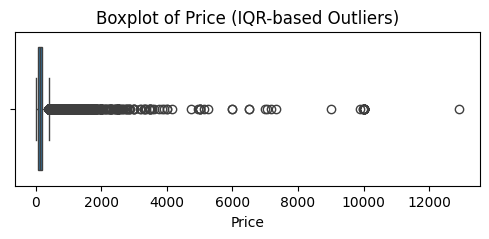

In [60]:
# 画Boxplot
plt.figure(figsize=(6, 2))
sns.boxplot(x=df['price'])
plt.xlabel("Price")
plt.title("Boxplot of Price (IQR-based Outliers)")
plt.show()

In [61]:
# visualise outliers
df[df['is_outlier_iqr']].sort_values('price', ascending=False).head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,has_accuracy_review,has_cleanliness_review,has_checkin_review,has_communication_review,has_location_review,has_value_review,has_rating_review,has_host_listings_count,has_host_total_listings_count,is_outlier_iqr
20027,37828926,https://www.airbnb.com/rooms/37828926,20220603182654,2022-06-03,Group Stay @ Northern Lights Mansion,You'll be entering into 1880 renovated brownst...,Northern Lights Mansion locates in the middle ...,https://a0.muscache.com/pictures/9906874b-1396...,1261480,https://www.airbnb.com/users/show/1261480,...,0,0,0,0,0,0,0,1,1,True
13477,22436899,https://www.airbnb.com/rooms/22436899,20220603182654,2022-06-04,1-BR Lincoln Center,"One bedroom, great neighborhood, steps away fr...",NaN,https://a0.muscache.com/pictures/e3571de1-a97b...,72390391,https://www.airbnb.com/users/show/72390391,...,0,0,0,0,0,0,0,1,1,True
31159,52862058,https://www.airbnb.com/rooms/52862058,20220603182654,2022-06-03,Lux Studio on Wall Street. Heart of Fidi!,Luxury studio located right on Wall Street. Ju...,NaN,https://a0.muscache.com/pictures/e2388507-1f5f...,57586379,https://www.airbnb.com/users/show/57586379,...,1,1,1,1,1,1,1,0,0,True
8997,13925864,https://www.airbnb.com/rooms/13925864,20220603182654,2022-06-04,Puerto Plata,Puerto Plata<br /><br /><b>The space</b><br />...,Muy hermosa,https://a0.muscache.com/pictures/miso/Hosting-...,58480311,https://www.airbnb.com/users/show/58480311,...,1,1,1,1,1,1,1,1,1,True
20600,38993556,https://www.airbnb.com/rooms/38993556,20220603182654,2022-06-04,"The Gregory Hotel, Tailored King","Herald Square gem dating back to 1903, steps f...",NaN,https://a0.muscache.com/pictures/b0e5d6ed-c33e...,298338860,https://www.airbnb.com/users/show/298338860,...,1,1,1,1,1,1,1,1,1,True
20601,38993616,https://www.airbnb.com/rooms/38993616,20220603182654,2022-06-04,"The Gregory Hotel, Tailored Double Queen","Herald Square gem dating back to 1903, steps f...",NaN,https://a0.muscache.com/pictures/b0e5d6ed-c33e...,298338860,https://www.airbnb.com/users/show/298338860,...,1,1,1,1,1,1,1,1,1,True
20602,38993679,https://www.airbnb.com/rooms/38993679,20220603182654,2022-06-04,"The Gregory Hotel, Tailored King with Sofa Bed","Herald Square gem dating back to 1903, steps f...",NaN,https://a0.muscache.com/pictures/b0e5d6ed-c33e...,298338860,https://www.airbnb.com/users/show/298338860,...,1,1,1,1,1,1,1,1,1,True
20668,39100961,https://www.airbnb.com/rooms/39100961,20220603182654,2022-06-04,"Chambers Hotel, Chambers Hotel Queen - ADA",With its art-laden lobby and rooms (over 500 w...,NaN,https://a0.muscache.com/pictures/pro_photo_too...,220229838,https://www.airbnb.com/users/show/220229838,...,0,0,0,0,0,0,0,1,1,True
35768,603665411466936794,https://www.airbnb.com/rooms/603665411466936794,20220603182654,2022-06-04,New York Estate,New York Estate is located in the most prestig...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,34906299,https://www.airbnb.com/users/show/34906299,...,0,0,0,0,0,0,0,1,1,True
19492,36585716,https://www.airbnb.com/rooms/36585716,20220603182654,2022-06-04,"Ameritania Hotel, Standard 1 Queen",Classic Beaux Arts stunner in the heart of Tim...,NaN,https://a0.muscache.com/pictures/f8788bc6-032d...,269823883,https://www.airbnb.com/users/show/269823883,...,0,0,0,0,0,0,0,1,1,True


In [62]:
# handler outliers
df['outlier_type'] = 'normal'
df.loc[df['price'] <= 0, 'outlier_type'] = 'impossible'
# 假设：超过 99.9% 分位，且是 10 的整数倍 → 怀疑多一个 0
p999 = df['price'].quantile(0.999)

df.loc[
    (df['price'] > p999) &
    (df['price'] % 10 == 0),
    'outlier_type'
] = 'likely_error'
# 合理极端（统计异常但业务合理）
df.loc[
    (df['is_outlier_iqr']) &
    (df['outlier_type'] == 'normal'),
    'outlier_type'
] = 'legit_extreme'
# 删除不可能值和明显错误值，保留合理极端
df = df[df['outlier_type'] != 'impossible']
df = df[df['outlier_type'] != 'likely_error']

In [63]:
df['outlier_type'].value_counts()

,count
outlier_type,
normal,34345
legit_extreme,3007


In [64]:
# Feature type separation
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print("Numerical features:")
print(numerical_features)

print("\nCategorical features:")
print(categorical_features)

print("Numerical feature count:", len(numerical_features))
print("Categorical feature count:", len(categorical_features))

df[numerical_features].describe().T.head()

Numerical features:
['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'has_reviews', 'accommodates_was_zero', 'has_accuracy_review', 'has_clea

,count,mean,std,min,25%,50%,75%,max
id,37352.0,6.106547e+16,1.806827e+17,2.595000e+03,1.468949e+07,3.479777e+07,5.019635e+07,6.412414e+17
scrape_id,37352.0,2.022060e+13,1.320330e+01,2.022060e+13,2.022060e+13,2.022060e+13,2.022060e+13,2.022060e+13
host_id,37352.0,1.235341e+08,1.381743e+08,2.438000e+03,1.289181e+07,5.361070e+07,2.087039e+08,4.623937e+08
host_listings_count,37352.0,6.413932e+01,4.002371e+02,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.404000e+03
host_total_listings_count,37352.0,6.413932e+01,4.002371e+02,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.404000e+03


In [65]:
# Numerical Correlation Analysis
abs_corr = (
    df[numerical_features]
    .corr()["price"]
    .drop("price")
    .abs()
    .sort_values(ascending=False)
)

print(abs_corr)

accommodates                                    0.407989
bedrooms                                        0.355090
beds                                            0.317802
availability_30                                 0.181701
host_listings_count                             0.175401
host_total_listings_count                       0.175401
availability_60                                 0.167186
availability_90                                 0.166551
longitude                                       0.158579
calculated_host_listings_count_entire_homes     0.139585
availability_365                                0.133553
maximum_minimum_nights                          0.109119
minimum_nights_avg_ntm                          0.107534
calculated_host_listings_count                  0.102526
has_reviews                                     0.096858
has_rating_review                               0.089621
has_cleanliness_review                          0.089487
has_accuracy_review            

In [66]:
# Identify top 10 numerical features with price
top_10_features = abs_corr.head(10)

print(top_10_features)

accommodates                                   0.407989
bedrooms                                       0.355090
beds                                           0.317802
availability_30                                0.181701
host_listings_count                            0.175401
host_total_listings_count                      0.175401
availability_60                                0.167186
availability_90                                0.166551
longitude                                      0.158579
calculated_host_listings_count_entire_homes    0.139585
Name: price, dtype: float64


In [85]:
# Top 10 feature names
top_10_feature_names = top_10_features.index.tolist()

# Subset dataframe: top 10 features + price
heatmap_df = df[top_10_feature_names + ["price"]]

# Correlation matrix
corr_matrix = heatmap_df.corr()

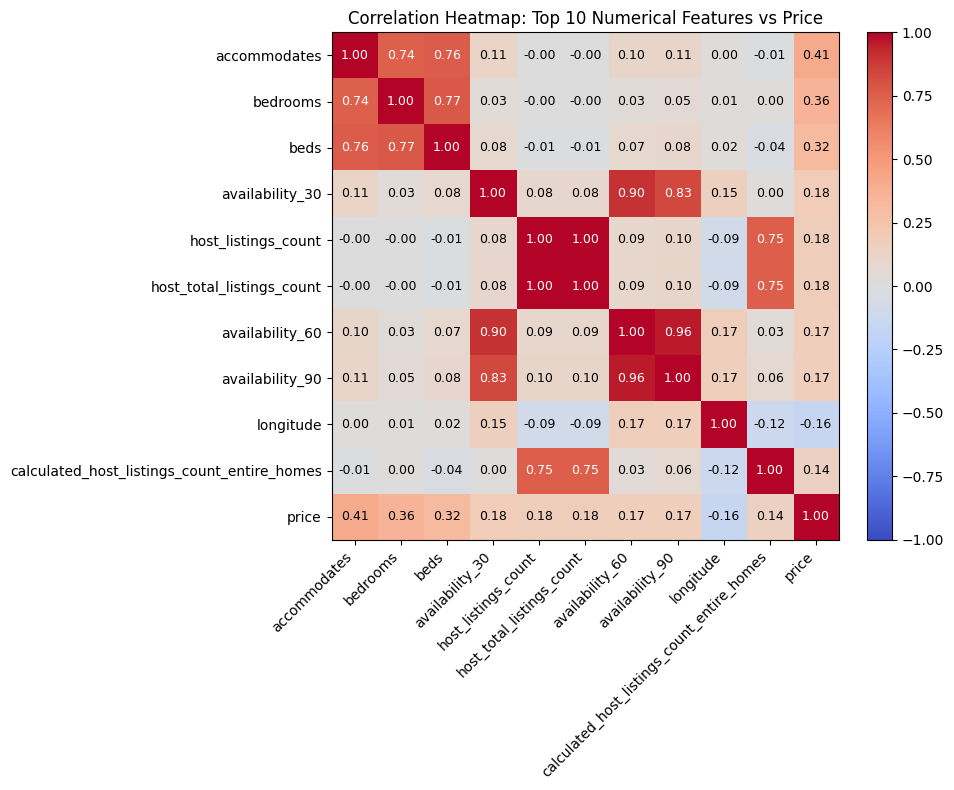

In [87]:
# Top 10的相关性热力图
# Plot
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Colorbar
plt.colorbar(im, fraction=0.046, pad=0.04)

# Axis ticks
plt.xticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    ticks=np.arange(len(corr_matrix.index)),
    labels=corr_matrix.index
)

# ---- Add correlation values to each cell ----
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        value = corr_matrix.iloc[i, j]
        plt.text(
            j, i,
            f"{value:.2f}",
            ha="center",
            va="center",
            color="black" if abs(value) < 0.5 else "white",
            fontsize=9
        )

plt.title("Correlation Heatmap: Top 10 Numerical Features vs Price")
plt.tight_layout()
plt.show()

In [67]:
# Hidden Categorical Analysis
# Examine basic statistics of these features
df[top_10_feature_names].describe()

,accommodates,bedrooms,beds,availability_30,host_listings_count,host_total_listings_count,availability_60,availability_90,longitude,calculated_host_listings_count_entire_homes
count,37352.000000,33732.000000,36483.000000,37352.000000,37352.000000,37352.000000,37352.000000,37352.000000,37352.000000,37352.000000
mean,2.904369,1.353492,1.633720,4.695625,64.139323,64.139323,12.791203,23.525594,-73.946124,9.410875
std,1.960046,0.731860,1.144516,8.215213,400.237057,400.237057,18.616257,29.505114,0.056717,45.455615
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-74.269520,0.000000
25%,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-73.983463,0.000000
50%,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,7.000000,-73.953740,1.000000
75%,4.000000,1.000000,2.000000,6.000000,3.000000,3.000000,23.000000,44.000000,-73.926300,1.000000
max,16.000000,15.000000,42.000000,30.000000,3404.000000,3404.000000,60.000000,90.000000,-73.693210,391.000000


In [68]:
encoded_categorical_features = []

for col in top_10_feature_names:
    unique_vals = df[col].nunique()
    is_integer = (df[col].dropna() % 1 == 0).all()

    if unique_vals <= 10 and is_integer:
        encoded_categorical_features.append(col)

encoded_categorical_features

[]

In [69]:
for col in encoded_categorical_features:
    print(f"\n{col} unique values:")
    print(df[col].value_counts().sort_index())

    # No hidden categorical features

In [74]:
# Create a summary table of cardinality
cat_cardinality = pd.DataFrame({
    "feature": categorical_features,
    "cardinality": [df[col].nunique(dropna=True) for col in categorical_features]
}).sort_values(by="cardinality", ascending=False)

cat_cardinality

,feature,cardinality
0,listing_url,37352
5,picture_url,36252
2,name,36108
3,description,33454
27,amenities,31222
6,host_url,24984
15,host_thumbnail_url,24680
16,host_picture_url,24680
4,neighborhood_overview,18331
10,host_about,13723


In [78]:
# Categorize features by cardinality
low_cardinality = cat_cardinality[cat_cardinality["cardinality"] <= 10]["feature"].tolist()
mid_cardinality = cat_cardinality[
    (cat_cardinality["cardinality"] > 10) & (cat_cardinality["cardinality"] <= 50)
]["feature"].tolist()
high_cardinality = cat_cardinality[cat_cardinality["cardinality"] > 50]["feature"].tolist()

print("Low-cardinality:", low_cardinality)
print("Mid-cardinality:", mid_cardinality)
print("High-cardinality:", high_cardinality)

Low-cardinality: ['host_verifications', 'neighbourhood_group_cleansed', 'host_response_time', 'license', 'room_type', 'last_scraped', 'host_has_profile_pic', 'host_is_superhost', 'host_identity_verified', 'calendar_last_scraped', 'has_availability', 'instant_bookable', 'is_outlier_iqr', 'outlier_type']
Mid-cardinality: ['bathrooms_text']
High-cardinality: ['listing_url', 'picture_url', 'name', 'description', 'amenities', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'neighborhood_overview', 'host_about', 'host_name', 'host_since', 'first_review', 'last_review', 'host_location', 'host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood', 'host_acceptance_rate', 'host_response_rate', 'property_type']


In [79]:
# Encoding for categorical features.
df_encoded = df.copy()

df_encoded = pd.get_dummies(
    df_encoded,
    columns=low_cardinality,
    drop_first=True
)

In [81]:
def merge_rare_categories(series, min_freq=0.01):
    freq = series.value_counts(normalize=True)
    rare_categories = freq[freq < min_freq].index
    return series.replace(rare_categories, "Other")

In [82]:
for col in mid_cardinality:
    df_encoded[col] = merge_rare_categories(df_encoded[col], min_freq=0.01)

df_encoded = pd.get_dummies(
    df_encoded,
    columns=mid_cardinality,
    drop_first=True
)

In [83]:
for col in high_cardinality:
    freq_map = df[col].value_counts(normalize=True)
    df_encoded[col + "_freq"] = df[col].map(freq_map)

# Drop original high-cardinality categorical columns
df_encoded.drop(columns=high_cardinality, inplace=True)

In [84]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37352 entries, 0 to 37409
Columns: 107 entries, id to property_type_freq
dtypes: bool(35), float64(45), int64(27)
memory usage: 22.0 MB


In [77]:
# Use Random Forest to identify non-linear influential features.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select numerical features only (safe choice for interpretation)
X = df.select_dtypes(include=[np.number]).drop(columns=["price"])
y = df["price"]

# Handle missing values (simple & acceptable for RF)
X = X.fillna(X.median())

# Train-test split (not for performance, just for stability)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest (interpretability-focused)
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Feature importance
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Top 10 non-linear influential features
rf_top10 = rf_importance.head(10)

print(rf_top10)

accommodates                 0.155769
longitude                    0.138470
latitude                     0.076162
host_id                      0.064167
id                           0.058210
availability_90              0.053225
availability_60              0.031876
availability_365             0.030271
bedrooms                     0.030119
review_scores_cleanliness    0.024235
dtype: float64


In [89]:
# Check for Skewness
numerical_df = df[numerical_features]  # 关键：用列名 list 取出 DataFrame

# Compute skewness
skewness = numerical_df.skew().sort_values(ascending=False)

print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
maximum_nights                                  193.216690
minimum_maximum_nights                           37.154980
maximum_nights_avg_ntm                           30.055595
maximum_maximum_nights                           25.102418
number_of_reviews_ltm                            16.946836
calculated_host_listings_count_shared_rooms      14.115922
price                                            13.180445
minimum_nights                                   13.004049
minimum_minimum_nights                           12.917356
reviews_per_month                                11.585302
number_of_reviews_l30d                            9.471370
maximum_minimum_nights                            8.113034
minimum_nights_avg_ntm                            8.103461
host_listings_count                               7.692543
host_total_listings_count                         7.692543
calculated_host_listings_count_entire_homes       7.013192
calculated_host_listings

Skewness of price: 13.18


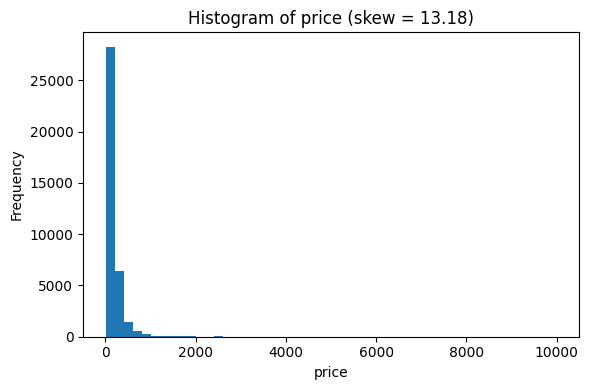

In [97]:
# Check for sknewness
# Compute skewness of price
price_skewness = df["price"].skew()

print(f"Skewness of price: {price_skewness:.2f}")

# Plot histogram of price
plt.figure(figsize=(6, 4))
plt.hist(df["price"].dropna(), bins=50)
plt.title(f"Histogram of price (skew = {price_skewness:.2f})")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [98]:
# log transformation
# Create a log-transformed price column
df["log_price"] = np.log(df["price"])

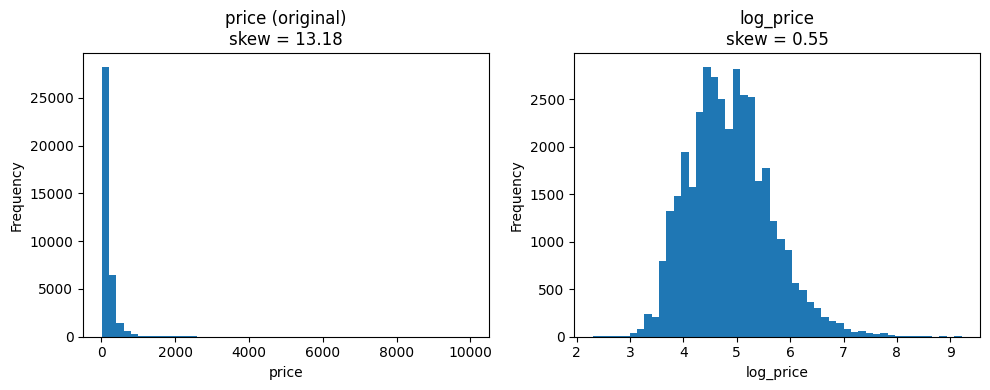

In [101]:
# Compute skewness
price_skew = df["price"].skew()
log_price_skew = df["log_price"].skew()

# Plot before vs after
plt.figure(figsize=(10, 4))

# Original price
plt.subplot(1, 2, 1)
plt.hist(df["price"].dropna(), bins=50)
plt.title(f"price (original)\nskew = {price_skew:.2f}")
plt.xlabel("price")
plt.ylabel("Frequency")

# Log-transformed price
plt.subplot(1, 2, 2)
plt.hist(df["log_price"].dropna(), bins=50)
plt.title(f"log_price\nskew = {log_price_skew:.2f}")
plt.xlabel("log_price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [102]:
df.to_csv("listings_2_cleaned.csv", index=False)

print("Cleaned file saved as listings_2_cleaned.csv")

Cleaned file saved as listings_2_cleaned.csv
